In [1]:
import numpy as np # linear algebra
import pandas as pd # analyze data
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("pd_speech_features.csv")
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [2]:
def precision(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FP[i]==0):
            TP[i]=0.00000001
            FP[i]=0.00000001
            sonuc+=(TP[i]/(TP[i]+FP[i]))

        sonuc=sonuc/len(class_id)
    return sonuc


In [3]:
def recall(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TP[i]==0 or FN[i]==0):
            TP[i]=0.00000001
            FN[i]=0.00000001
            sonuc+=(TP[i]/(TP[i]+FN[i]))
        sonuc=sonuc/len(class_id)
    return sonuc

In [4]:
def accuracy(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        sonuc+=((TP[i]+TN[i])/(TP[i]+FP[i]+TN[i]+FN[i]))
        sonuc=sonuc/len(class_id)
    return sonuc

In [5]:
def specificity(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FP[i]==0):
            TN[i]=0.00000001
            FP[i]=0.00000001
            sonuc+=(TN[i]/(FP[i]+TN[i]))
        sonuc=sonuc/len(class_id)
    return sonuc


In [6]:
def NPV(class_id,TP, FP, TN, FN):
    sonuc=0
    for i in range(0,len(class_id)):
        if (TN[i]==0 or FN[i]==0):
            TN[i]=0.00000001
            FN[i]=0.00000001
            sonuc+=(TN[i]/(TN[i]+FN[i]))
        sonuc=sonuc/len(class_id)
    return sonuc


In [7]:
def perf_measure(y_actual, y_pred):
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []
    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in range(len(y_pred)):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                 FN[index] += 1
    return class_id,TP, FP, TN, FN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [9]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

man: 390 woman: 366


<Axes: >

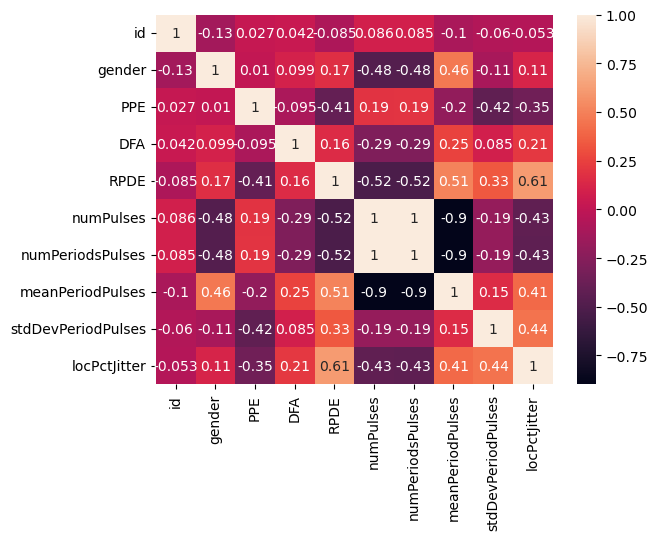

In [10]:
man=df.gender.sum()
total=df.gender.count()
woman=total-man
print("man: "+str(man)+" woman: "+str(woman))
sns.heatmap(df[df.columns[0:10]].corr(),annot=True)

In [11]:
df.shape

(756, 755)

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
y=df["class"]
x=df.iloc[:,2:7]
xnew2=SelectKBest(f_classif, k=5).fit_transform(x, y)
auc_scor=[]
precision_scor=[]
x.head()
x=pd.DataFrame(xnew2)
x.head()
y.value_counts()
y=y.values
type(y)

numpy.ndarray

In [13]:
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [15]:
score_liste=[]
recall_scor=[]
f1_scor=[]
LR_plus=[]
LR_eksi=[]
odd_scor=[]
NPV_scor=[]
youden_scor=[]
specificity_scor=[]
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
error_rate = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.1762114537444934 at K = 10


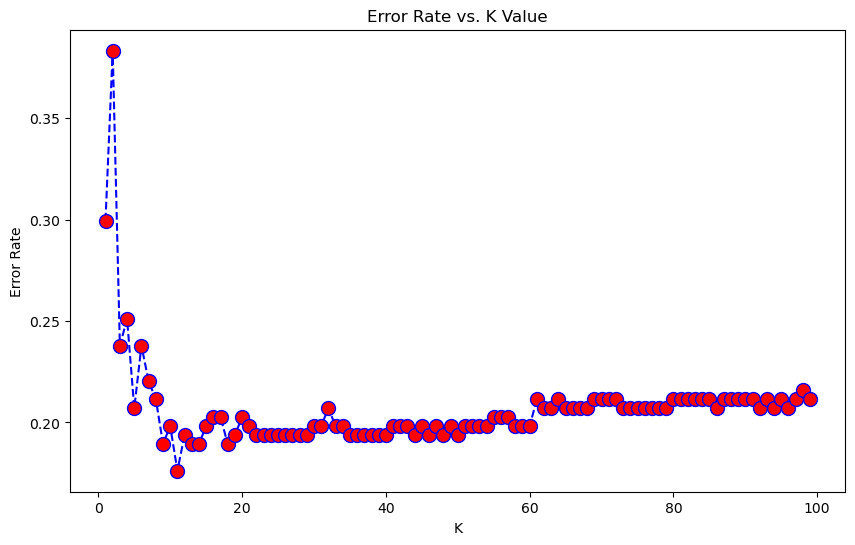

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed',
 marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [17]:
k=10
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train,y_train)
y_head=knn.predict(x_test)
print("KNN Algorithm test accuracy",knn.score(x_test,y_test))

KNN Algorithm test accuracy 0.801762114537445


In [18]:
classid,tn,fp,fn,tp=perf_measure(y_test,y_head)
auc_scor.append(roc_auc_score(y_test,y_head))
score_liste.append(accuracy(classid,tn,fp,fn,tp))
precision_scor.append(precision(classid,tn,fp,fn,tp))
recall_scor.append(recall(classid,tn,fp,fn,tp))
f1_scor.append(f1_score(y_test,y_head,average='macro'))
NPV_scor.append(NPV(classid,tn,fp,fn,tp))
specificity_scor.append(specificity(classid,tn,fp,fn,tp))

In [19]:
LR_plus.append((recall(classid,tn,fp,fn,tp)/(1-specificity(classid,tn,fp,fn,tp))))
if specificity(classid,tn,fp,fn,tp) != 0:
    LR_eksi.append(((1-recall(classid,tn,fp,fn,tp))/specificity(classid,tn,fp,fn,tp)))
else:
    # Handle the case when specificity is zero (division by zero)
    LR_eksi.append(float('inf'))  # Assign a value that represents infinity or handle it according to your specific needs
denominator_1 = (1 - specificity(classid, tn, fp, fn, tp))
denominator_2 = specificity(classid, tn, fp, fn, tp)

if denominator_1 != 0 and denominator_2 != 0:
    odd_scor.append(recall(classid, tn, fp, fn, tp) / denominator_1 / ((1 - recall(classid, tn, fp, fn, tp)) / denominator_2))
else:
    # Handle the case when either denominator is zero (division by zero)
    odd_scor.append(float('inf'))  # Assign a value that represents infinity or handle it according to your specific needs

youden_scor.append((recall(classid,tn,fp,fn,tp)+specificity(classid,tn,fp,fn,tp)-1))


In [20]:
print("KNN algorithm report: \n",classification_report(y_test,y_head))

KNN algorithm report: 
               precision    recall  f1-score   support

           0       0.54      0.44      0.48        48
           1       0.86      0.90      0.88       179

    accuracy                           0.80       227
   macro avg       0.70      0.67      0.68       227
weighted avg       0.79      0.80      0.79       227



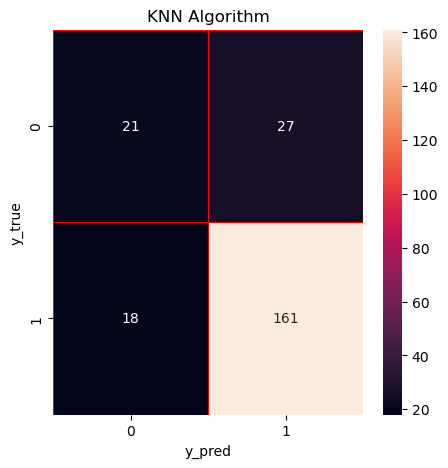

In [21]:
from sklearn.metrics import confusion_matrix
cmknn = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmknn,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("KNN Algorithm")
plt.show()


In [22]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_head=nb.predict(x_test)
print("Naive Bayes Algorithm test accuracy",nb.score(x_test,y_test))

Naive Bayes Algorithm test accuracy 0.8105726872246696


In [23]:
classid, tn, fp, fn, tp = perf_measure(y_test, y_head)
auc_scor.append(roc_auc_score(y_test, y_head))
score_liste.append(accuracy(classid, tn, fp, fn, tp))
precision_scor.append(precision(classid, tn, fp, fn, tp))
recall_scor.append(recall(classid, tn, fp, fn, tp))
f1_scor.append(f1_score(y_test, y_head, average='macro'))
NPV_scor.append(NPV(classid, tn, fp, fn, tp))
specificity_scor.append(specificity(classid, tn, fp, fn, tp))
TPR = recall(classid, tn, fp, fn, tp)
TNR = specificity(classid, tn, fp, fn, tp)
FPR = 1 - TNR
if FPR == 0:
    FPR = 0.00001
FNR = 1 - TPR

lrminus = FNR / TNR if TNR != 0 else float('inf')
lrarti = TPR / FPR if FPR != 0 else float('inf')

if lrminus == 0:
    lrminus = 0.00000001

if TPR != 0 and FPR != 0:
    LR_plus.append(TPR / FPR)
else:
    LR_plus.append(float('inf'))

if FNR != 0 and TNR != 0:
    LR_eksi.append(FNR / TNR)
else:
    LR_eksi.append(float('inf'))

if lrminus != 0:
    odd_scor.append(lrarti / lrminus)
else:
    odd_scor.append(float('inf'))

youden_scor.append(TPR + TNR - 1)

print("Naive Bayes algorithm report: \n", classification_report(y_test, y_head))


Naive Bayes algorithm report: 
               precision    recall  f1-score   support

           0       0.56      0.52      0.54        48
           1       0.87      0.89      0.88       179

    accuracy                           0.81       227
   macro avg       0.71      0.70      0.71       227
weighted avg       0.81      0.81      0.81       227



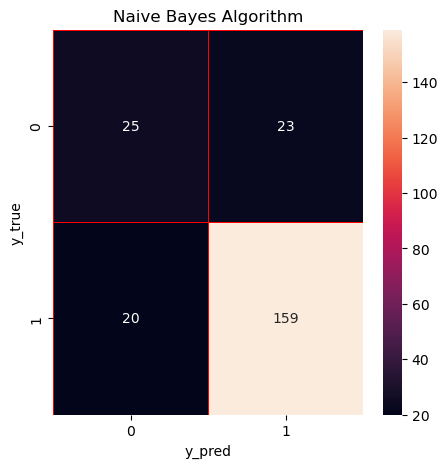

In [24]:
cmnb = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmnb,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Naive Bayes Algorithm")
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0, max_iter=300)
lr.fit(x_train, y_train)
y_head = lr.predict(x_test)

print("Logistic Regression test accuracy:", lr.score(x_test, y_test))

classid, tn, fp, fn, tp = perf_measure(y_test, y_head)
auc_scor.append(roc_auc_score(y_test, y_head))
score_liste.append(accuracy_score(y_test, y_head))
precision_scor.append(precision_score(y_test, y_head))
recall_scor.append(recall_score(y_test, y_head))
f1_scor.append(f1_score(y_test, y_head, average='macro'))

NPV_scor.append(NPV(classid, tn, fp, fn, tp))
specificity_scor.append(specificity(classid, tn, fp, fn, tp))
TPR = recall(classid, tn, fp, fn, tp)
TNR = specificity(classid, tn, fp, fn, tp)
FPR = 1 - TNR

if FPR == 0:
    FPR = 0.00001

FNR = 1 - TPR

if TNR != 0:
    lrminus = FNR / TNR
else:
    lrminus = 0.00000001

if FPR != 0:
    lrarti = TPR / FPR
else:
    lrarti = float('inf')

LR_plus.append(TPR / FPR)

if TNR != 0:
    LR_eksi.append(FNR / TNR)
else:
    LR_eksi.append(0.00000001)

odd_scor.append(lrarti / lrminus)
youden_scor.append(TPR + TNR - 1)

print("Logistic Regression report:\n", classification_report(y_test, y_head))


Logistic Regression test accuracy: 0.7929515418502202
Logistic Regression report:
               precision    recall  f1-score   support

           0       0.54      0.15      0.23        48
           1       0.81      0.97      0.88       179

    accuracy                           0.79       227
   macro avg       0.67      0.56      0.55       227
weighted avg       0.75      0.79      0.74       227



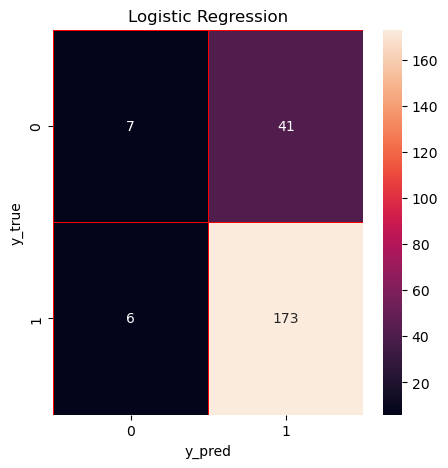

In [26]:
cmlr = confusion_matrix(y_test,y_head)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cmlr,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression")
plt.show()

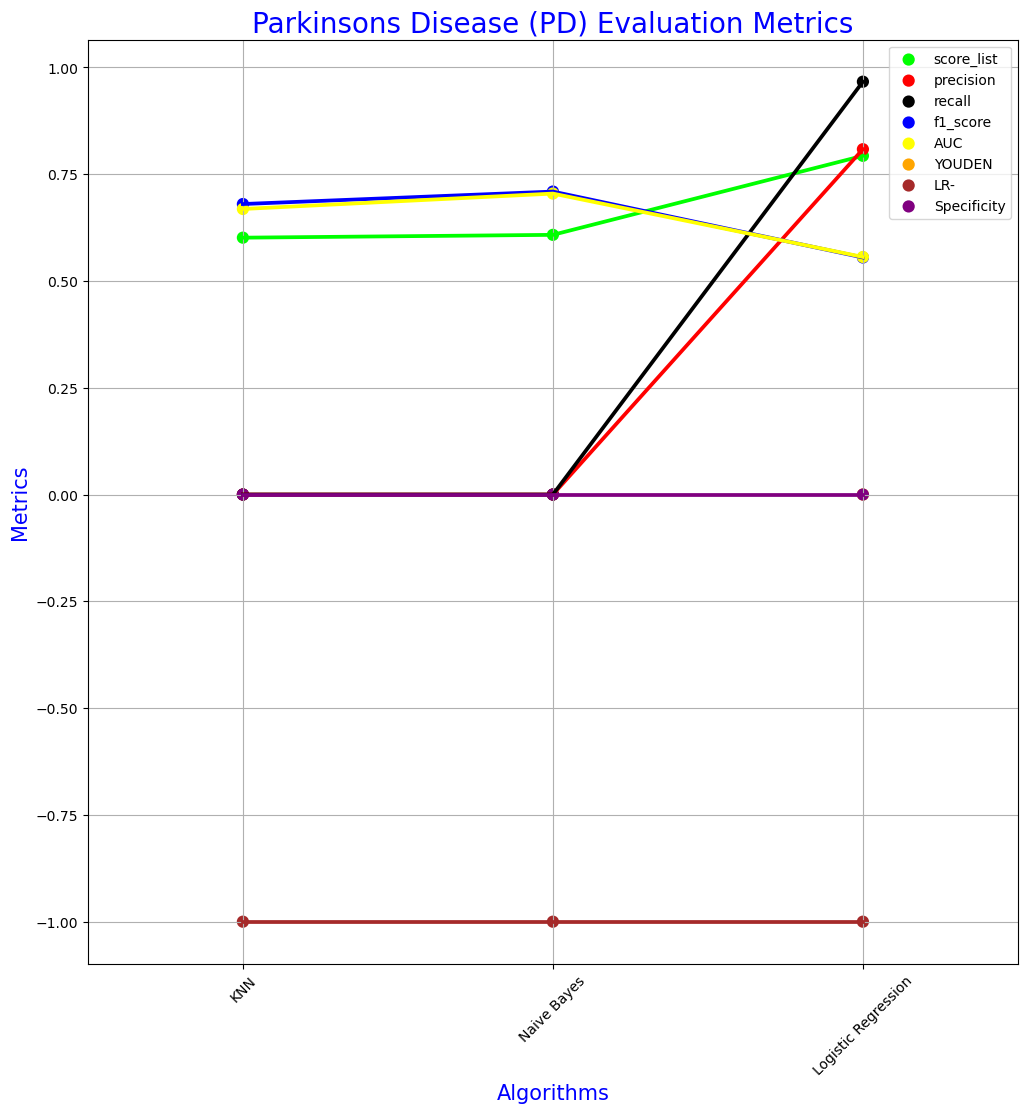

GaussianNB()


In [27]:
# import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
algo_list = ["KNN", "Naive Bayes", "Logistic Regression"]
score = {
    "algo_list": algo_list,
    "score_list": score_liste,
    "precision": precision_scor,
    "recall": recall_scor,
    "f1_score": f1_scor,
    "AUC": auc_scor,
    "LR+": LR_plus,
    "LR-": LR_eksi,
    "ODD": odd_scor,
    "YOUDEN": youden_scor,
    "Specificity": specificity_scor,
}

# Find the maximum length among all the arrays
max_length = max(len(v) for v in score.values())

# Extend the arrays to the maximum length by repeating the last value
score = {k: v + [v[-1]] * (max_length - len(v)) for k, v in score.items()}

# Create the DataFrame
z = pd.DataFrame(score)

# Plotting
f, ax1 = plt.subplots(figsize=(12, 12))
sns.pointplot(x=z['algo_list'], y=z['score_list'], data=z, color='lime', label="score_list")
sns.pointplot(x=z['algo_list'], y=z['precision'], data=z, color='red', label="precision")
sns.pointplot(x=z['algo_list'], y=z['recall'], data=z, color='black', label="recall")
sns.pointplot(x=z['algo_list'], y=z['f1_score'], data=z, color='blue', label="f1_score")
sns.pointplot(x=z['algo_list'], y=z['AUC'], data=z, color='yellow', label="AUC")
sns.pointplot(x=z['algo_list'], y=z['LR-'], data=z, color='orange', label="YOUDEN")
sns.pointplot(x=z['algo_list'], y=z['YOUDEN'], data=z, color='brown', label="LR-")
sns.pointplot(x=z['algo_list'], y=z['Specificity'], data=z, color='purple', label="Specificity")
plt.xlabel('Algorithms', fontsize=15, color='blue')
plt.ylabel('Metrics', fontsize=15, color='blue')
plt.xticks(rotation=45)
plt.title('Parkinsons Disease (PD) Evaluation Metrics', fontsize=20, color='blue')
plt.grid()
plt.legend()
plt.show()
with open('model.pkl','wb') as f:
    pickle.dump(nb,f)
model=pickle.load(open('model.pkl','rb'))
print(model)
